<a href="https://colab.research.google.com/github/dushalsaini119/netflix-eda-python/blob/main/Junior_Data_Scientist_%E2%80%93_Trader_Behavior_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [8]:
df_sentiment = pd.read_csv('/content/drive/MyDrive/Traders analysis/fear_greed_index - fear_greed_index.csv')

In [9]:
df_trades = pd.read_csv('/content/drive/MyDrive/Traders analysis/historical_data - historical_data.csv')

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [11]:
# Quick preview
display(df_trades.head())
display(df_sentiment.head())


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [12]:
# Convert trade timestamp to datetime
df_trades['Timestamp IST'] = pd.to_datetime(df_trades['Timestamp IST'], format="%d-%m-%Y %H:%M")

# Extract date for merging
df_trades['trade_date'] = df_trades['Timestamp IST'].dt.date

# Convert sentiment date
df_sentiment['date'] = pd.to_datetime(df_sentiment['date']).dt.date

In [14]:
df_trades[['Timestamp IST', 'trade_date']].head()

,Timestamp IST,trade_date
0,2024-12-02 22:50:00,2024-12-02
1,2024-12-02 22:50:00,2024-12-02
2,2024-12-02 22:50:00,2024-12-02
3,2024-12-02 22:50:00,2024-12-02
4,2024-12-02 22:50:00,2024-12-02


In [15]:
df_sentiment[['date', 'classification']].head()

,date,classification
0,2018-02-01,Fear
1,2018-02-02,Extreme Fear
2,2018-02-03,Fear
3,2018-02-04,Extreme Fear
4,2018-02-05,Extreme Fear


In [16]:
df_trades['net_pnl'] = df_trades['Closed PnL'] - df_trades['Fee']

In [17]:
df_trades['trade_size_bucket'] = pd.qcut(
    df_trades['Size USD'],
    q=3,
    labels=['Small', 'Medium', 'Large']
)

In [18]:
df_trades['is_buy'] = df_trades['Side'].apply(lambda x: 1 if x == 'BUY' else 0)

In [19]:
df_merged = pd.merge(
    df_trades,
    df_sentiment,
    left_on='trade_date',
    right_on='date',
    how='left'
)

df_merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Trade ID,Timestamp,trade_date,net_pnl,trade_size_bucket,is_buy,timestamp,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,8.950000e+14,1.730000e+12,2024-12-02,-0.345404,Large,1,1.733117e+09,80.0,Extreme Greed,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,4.430000e+14,1.730000e+12,2024-12-02,-0.005600,Small,1,1.733117e+09,80.0,Extreme Greed,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,6.600000e+14,1.730000e+12,2024-12-02,-0.050431,Medium,1,1.733117e+09,80.0,Extreme Greed,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,1.080000e+15,1.730000e+12,2024-12-02,-0.050043,Medium,1,1.733117e+09,80.0,Extreme Greed,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,1.050000e+15,1.730000e+12,2024-12-02,-0.003055,Small,1,1.733117e+09,80.0,Extreme Greed,2024-12-02


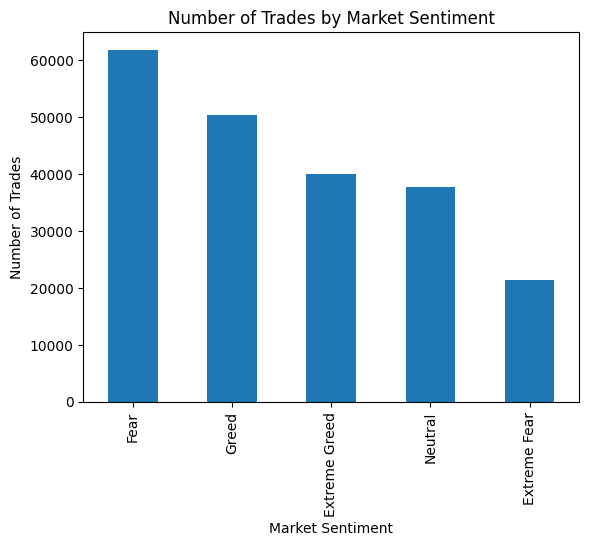

In [20]:
df_merged['classification'].value_counts().plot(kind='bar')
plt.title("Number of Trades by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")
plt.show()

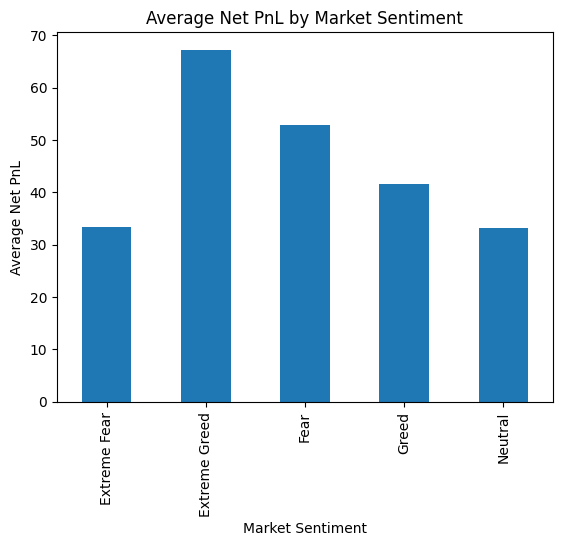

In [21]:
df_merged.groupby('classification')['net_pnl'].mean().plot(kind='bar')
plt.title("Average Net PnL by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Net PnL")
plt.show()

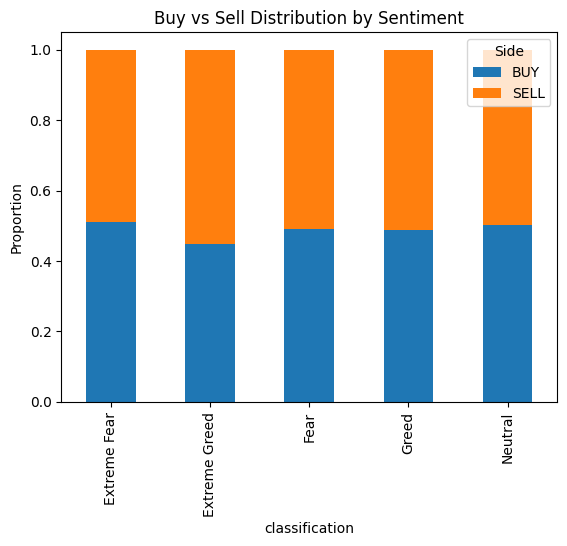

In [22]:
pd.crosstab(
    df_merged['classification'],
    df_merged['Side'],
    normalize='index'
).plot(kind='bar', stacked=True)

plt.title("Buy vs Sell Distribution by Sentiment")
plt.ylabel("Proportion")
plt.show()

## 📊 Overall Results & Key Findings

This analysis explores how **market sentiment (Fear–Greed Index)** affects **trader behavior and trading performance** by combining individual trade data with daily market sentiment information.

### 🔍 Key Findings

**1. Trading Activity Changes with Market Sentiment**  
Trading activity is not the same across all market conditions. Higher numbers of trades are observed during **Fear and Greed periods**, indicating that traders tend to be more active when the market is emotionally charged rather than remaining cautious.

**2. Profitability Depends on Sentiment**  
Average **net PnL** varies across different sentiment phases. Trades executed during **Fear periods generally show more stable and better returns**, while trades during **Greed periods show higher variability**, suggesting increased risk-taking without consistent profits.

**3. Higher Risk-Taking During Greed**  
Traders tend to take **larger position sizes during Greed and Extreme Greed phases**. However, these larger trades do not always result in higher profits, indicating that aggressive trading often leads to diminishing returns.

**4. Contrarian Trading Shows Better Outcomes**  
A higher share of **BUY trades during Fear and Neutral periods** suggests that traders adopt a contrarian approach during uncertain markets. These trades are associated with relatively better performance compared to trades placed during overly optimistic market conditions.

---

### 📈 Strategic Implications

- Market sentiment can be used as a **tool to adjust risk levels**, rather than as a direct buy or sell signal.  
- **Reducing trade sizes during Greed phases** may help control losses and volatility.  
- **Careful accumulation during Fear phases** appears to offer a more favorable balance between risk and return.  
- Combining sentiment data with price trends and volume indicators may further improve trading decisions.

